<a href="https://colab.research.google.com/github/YanjunLin-Andrie/elan_price_prediction/blob/main/ELAN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Step 3: Create a Time Series Model with LSTM

In [1]:
# Import the required libraries and dependencies
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator

In [2]:
# Upload the "elan.csv" file into Colab, then store in a Pandas DataFrame

from google.colab import files
uploaded = files.upload()

Saving elan.csv to elan.csv


In [3]:
# Read the csv file into a dataframe
df = pd.read_csv('elan.csv')


# Review the first and last five rows of the DataFrame
display(df.head())
display(df.tail())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-20,32.250000,36.009998,32.049999,36.000000,36.000000,40182700
1,2018-09-21,34.560001,35.490002,33.880001,34.099998,34.099998,9269500
2,2018-09-24,34.099998,35.650002,33.700001,34.900002,34.900002,2769100
3,2018-09-25,34.759998,34.990002,34.060001,34.580002,34.580002,3152200
4,2018-09-26,34.349998,35.980000,34.250000,35.500000,35.500000,5835600


,Date,Open,High,Low,Close,Adj Close,Volume
938,2022-06-13,21.629999,21.84,21.049999,21.650000,21.650000,3361900
939,2022-06-14,21.680000,21.68,20.700001,20.900000,20.900000,3831700
940,2022-06-15,21.000000,21.27,20.430000,20.920000,20.920000,4286400
941,2022-06-16,20.420000,20.48,19.590000,20.280001,20.280001,9281600
942,2022-06-17,20.370001,20.91,20.299999,20.549999,20.549999,5938100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       943 non-null    object 
 1   Open       943 non-null    float64
 2   High       943 non-null    float64
 3   Low        943 non-null    float64
 4   Close      943 non-null    float64
 5   Adj Close  943 non-null    float64
 6   Volume     943 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 51.7+ KB


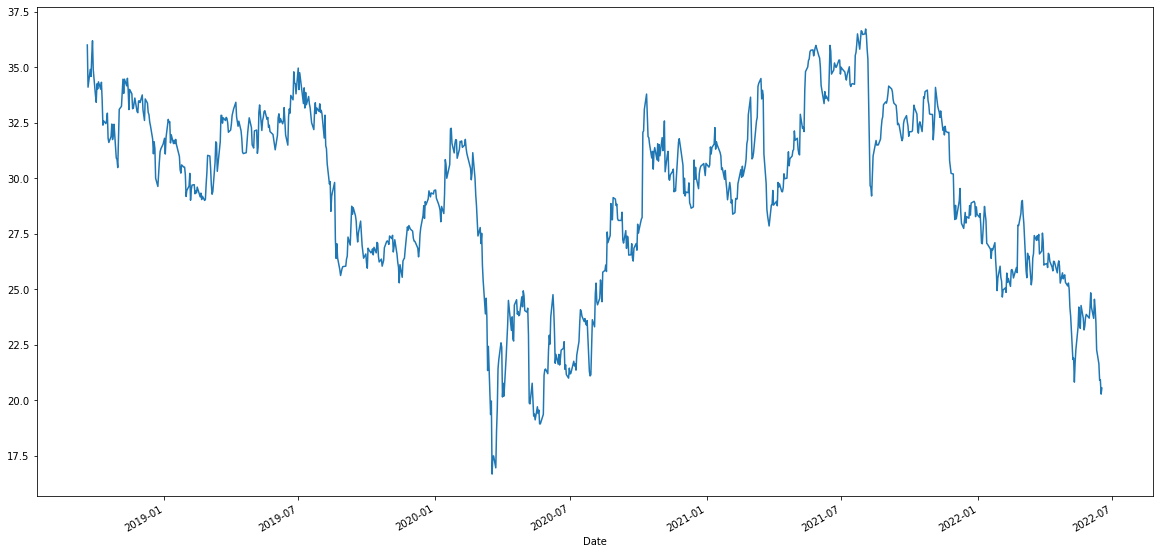

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_axis(df['Date'], inplace=True)
df.drop(columns=['Open', 'High', 'Low', 'Volume'], inplace=True)
df['Close'].plot(figsize=(20, 10))

In [6]:
close_data = df['Close'].values
close_data = close_data.reshape((-1,1))

split_percent = 0.80
split = int(split_percent*len(close_data))

close_train = close_data[:split]
close_test = close_data[split:]

date_train = df['Date'][:split]
date_test = df['Date'][split:]

print(len(close_train))
print(len(close_test))

754
189


In [7]:
look_back = 7

train_generator = TimeseriesGenerator(close_train, close_train, length=look_back, batch_size=20)     
test_generator = TimeseriesGenerator(close_test, close_test, length=look_back, batch_size=1)


In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(
    LSTM(30,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse')

num_epochs = 50
model.fit_generator(train_generator, epochs=num_epochs, verbose=1)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


38/38 [==============================] - 2s 6ms/step - loss: 730.5138
Epoch 2/50
38/38 [==============================] - 0s 5ms/step - loss: 22.4810
Epoch 3/50
38/38 [==============================] - 0s 6ms/step - loss: 5.4573
Epoch 4/50
38/38 [==============================] - 0s 6ms/step - loss: 3.1499
Epoch 5/50
38/38 [==============================] - 0s 6ms/step - loss: 2.7730
Epoch 6/50
38/38 [==============================] - 0s 6ms/step - loss: 2.1646
Epoch 7/50
38/38 [==============================] - 0s 5ms/step - loss: 1.9374
Epoch 8/50
38/38 [==============================] - 0s 6ms/step - loss: 1.7105
Epoch 9/50
38/38 [==============================] - 0s 5ms/step - loss: 1.4845
Epoch 10/50
38/38 [==============================] - 0s 6ms/step - loss: 1.2724
Epoch 11/50
38/38 [==============================] - 0s 5ms/step - loss: 1.3103
Epoch 12/50
38/38 [==============================] - 0s 6ms/step - loss: 1.2674
Epoch 13/50
38/38 [==============================] - 0s 6

In [9]:
import plotly.graph_objects as go
prediction = model.predict_generator(test_generator)

close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
prediction = prediction.reshape((-1))

trace1 = go.Scatter(
    x = date_train,
    y = close_train,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = date_test,
    y = prediction,
    mode = 'lines',
    name = 'Prediction'
)
trace3 = go.Scatter(
    x = date_test,
    y = close_test,
    mode='lines',
    name = 'Ground Truth'
)
layout = go.Layout(
    title = "Google Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [10]:
close_data = close_data.reshape((-1))

def predict(num_prediction, model):
    prediction_list = close_data[-look_back:]
    
    for _ in range(num_prediction):
        x = prediction_list[-look_back:] #[-3: ]
        # print(x)
        x = x.reshape((1, look_back, 1))
        out = model.predict(x)[0][0]
        # print(x)
        # print(out)
        prediction_list = np.append(prediction_list, out)
        
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list
    
def predict_dates(num_prediction):
    last_date = df['Date'].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

num_prediction = 5
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [14]:
dates_df= pd.DataFrame(forecast_dates)
dates_df.columns = ['Date']
dt = dates_df['Date'][:]
dt

0   2022-06-17
1   2022-06-18
2   2022-06-19
3   2022-06-20
4   2022-06-21
5   2022-06-22
Name: Date, dtype: datetime64[ns]

In [15]:


# dates_df['Date'] = pd.to_datetime(dates_df['Date'])
# date_list = dates_df.values.tolist()
# outlst = [''.join([str(c) for c in lst]) for lst in date_list]

# dates = []
# for date in outlst:
#   dates.append(date[:10])

# import datetime as dt
# for ts in dates:
#    forecast_dates = dt.datetime.fromtimestamp(int(ts)).date()
# forecast_dates

In [16]:
# close_train = close_train.reshape((-1))
close_test = close_test.reshape((-1))
forcast = forecast.reshape((-1))

trace1 = go.Scatter(
    x = date_test,
    y = close_test,
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = dt,
    y = forecast,
    mode = 'lines',
    name = 'Forecast'
)
# trace3 = go.Scatter(
#     x = date_test,
#     y = close_test,
#     mode='lines',
#     name = 'Ground Truth'
# )
layout = go.Layout(
    title = "ELAN Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()